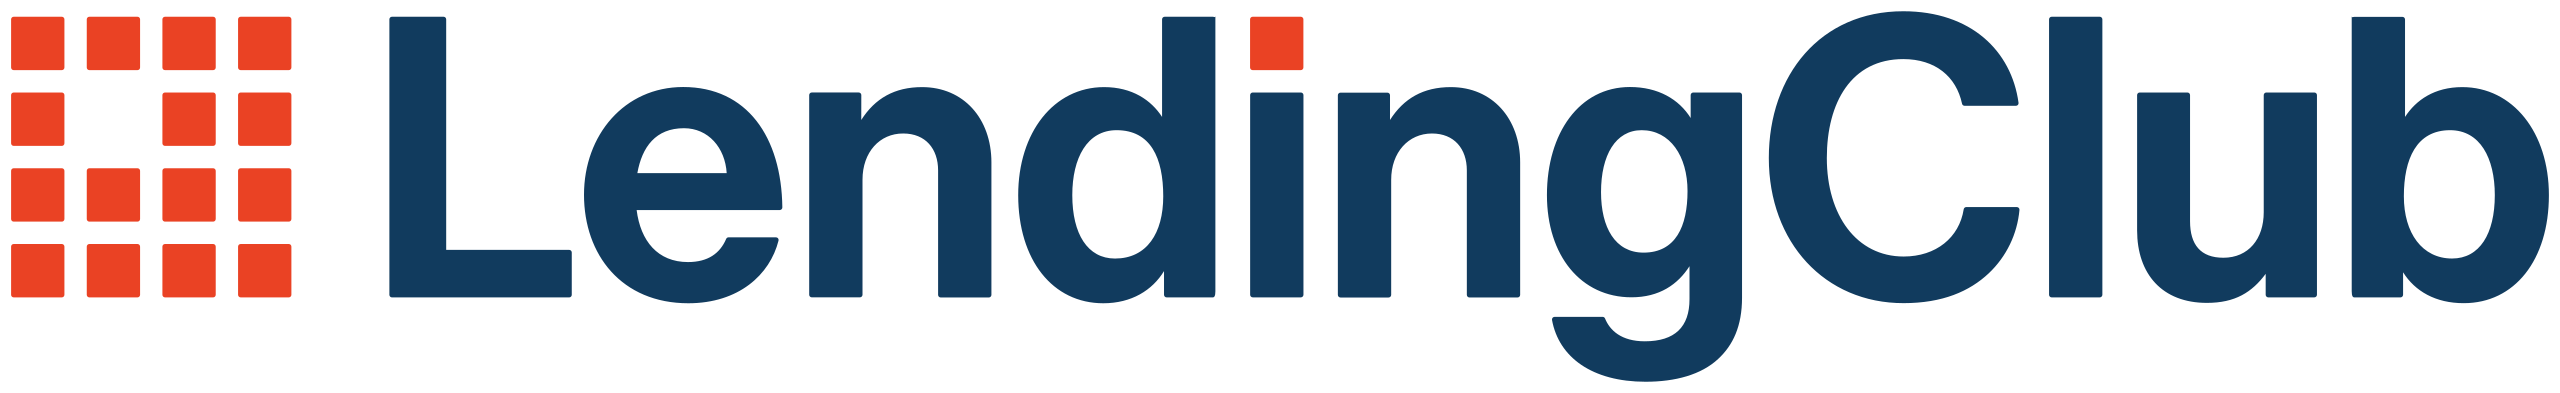

# Exploring Loan data from Lending Club

## Final Project - Part 3
 - Mohnish Tarak Bhagat (mbhagat3)
 - Ruthvik Bonthapally (rbonth2)
 
 ### Table of Content
* [Lending Club](#intro)
* [Importing and Synthesizing Dataset](#first-bullet)
* [Understanding Trends and Patterns](#second-bullet)
    - [Distribution of Loans across United States](#2-1)
    - [Accessing the Quality of Loans](#2-2)
    - [Checking the interest rates on Loans across various quality](#2-3)
* [References](#third-bullet)

## Lending Club<a class="anchor" id="intro"></a>
<br>
Lending club is a fin tech company that provides loans through crowdfunding. This means that individuals were looking to take a debt, who post the details of the loan on the website. It also has people who have surplus cash and want to make a better return on their investment as lenders of the loan. Lenders can make a higher return than a traditional savings account although it is quite possible that the borrower may default on their loan obligation and therefore carries an inherent risk. 
<br>
It is promoted to be a better alternative to traditional banking companies as the interest rates are usually lower for people who do not have the best credit rating history. And the below Jupyter notebook tries to analyze and understand the way these loans are working.

## Importing and Synthesizing Dataset <a class="anchor" id="first-bullet"></a>

In [1]:
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas 
import ipyleaflet
import numpy as np
import bqplot
import ipywidgets
import datetime

In [2]:
def get_ids_and_names(states_map):
    ids = []
    state_names = []
    state_data_vec = states_map.map_data['objects']['subunits']['geometries']
    for i in range(len(state_data_vec)):
        if state_data_vec[i]['properties'] is not None:
            state_names.append(state_data_vec[i]['properties']['name'])
            ids.append(state_data_vec[i]['id'])
    return np.array(ids), np.array(state_names)


In [3]:
abbrev_to_us_state = {
 'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming',
 'DC': 'District of Columbia',
 'AS': 'American Samoa',
 'GU': 'Guam',
 'MP': 'Northern Mariana Islands',
 'PR': 'Puerto Rico',
 'UM': 'United States Minor Outlying Islands',
 'VI': 'U.S. Virgin Islands'}

In [4]:
data = pd.read_csv("loans_full_schema.csv")

In [5]:
data["months_since_last_delinq"] = data["months_since_last_delinq"].fillna(0)

In [6]:
data['state'] = data['state'].replace(list(abbrev_to_us_state.keys()),list(abbrev_to_us_state.values()))

In [7]:
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,New Jersey,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,Hawaii,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,Wisconsin,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,Pennsylvania,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,California,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [8]:
table = pd.pivot_table(data, values='loan_amount', index=['state'], columns=['loan_purpose'], aggfunc=np.sum)
table.reset_index(inplace=True)
table.head()

loan_purpose,state,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
0,Alabama,NaN,347100.0,1275125.0,157725.0,11700.0,10300.0,17600.0,10000.0,107000.0,NaN,10000.0,NaN
1,Alaska,18000.0,160750.0,350300.0,40000.0,NaN,NaN,33000.0,NaN,30800.0,NaN,NaN,NaN
2,Arizona,12100.0,857750.0,2132700.0,486325.0,NaN,210000.0,25300.0,1000.0,255900.0,NaN,132400.0,NaN
3,Arkansas,6600.0,181850.0,630225.0,60400.0,NaN,16500.0,23200.0,NaN,43500.0,NaN,15000.0,2500.0
4,California,212750.0,4772700.0,11642275.0,1202000.0,310600.0,670150.0,360600.0,67200.0,2295725.0,5000.0,415200.0,119500.0


In [9]:
purpose = list(table.columns.values)
purpose = np.array(purpose[1:])
purpose1 = purpose.astype('str')
purpose = [i for i in range(len(purpose))]
purpose1

array(['car', 'credit_card', 'debt_consolidation', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation'], dtype='<U18')

## Understanding Trends and Patterns <a class="anchor" id="second-bullet"></a>

### Distribution of Loans across United States  <a class="anchor" id="2-1"></a>

First explore the purpose why people are taking loans from this website and their distribution across the United States. We have included an interactive chart veteran clicking on a state will produce a frequency distribution that represents the purpose of a loan taken in that state. Multiple States can be selected together to show a cumulative frequency distribution across all those States. If the displayed state is highlighted in red color that implies that you have selected that particular state to unselected you simply need to click on the state again and it will turn back to green color and the chart will be updated automatically.

In [10]:
sc_geo = bqplot.AlbersUSA()
state_data = bqplot.topo_load('map_data/USStatesMap.json')

def_tt = bqplot.Tooltip(fields=['id', 'name'])

states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=def_tt)
states_map.interactions = {'click': 'select', 'hover': 'tooltip'}

ids, state_names = get_ids_and_names(states_map)

fig=bqplot.Figure(marks=[states_map], title='US States Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})


# lets also make a Bar plot
x_scl = bqplot.OrdinalScale() 
y_scl = bqplot.LinearScale()
ax_xcl = bqplot.Axis(label='Purpose of Loan', scale=x_scl, tick_rotate=90)
ax_ycl = bqplot.Axis(label='Amount of Loan Issued in', 
                     scale=y_scl, 
                    orientation='vertical', side='left')
lines = bqplot.Bars(x = purpose1, y = np.zeros(len(purpose)),
                    scales = {'x': x_scl, 'y': y_scl})
fig_lines = bqplot.Figure(marks = [lines], 
                          axes = [ax_ycl, ax_xcl],)
fig_lines.axes[1].tick_style = {'text-anchor': 'start'}


def get_data_value(change):
    exports = np.zeros(len(purpose))
    snames = ''
    if change['owner'].selected is not None:
        for i,s in enumerate(change['owner'].selected):
            sn = state_names[s == ids][0]
            snames += sn + ', '
            exports_in=table.loc[table['state'] == sn].values[0][1:]
            exports = np.add(exports, exports_in.astype('float64'))
        lines.y = exports
        ax_ycl.label='Amount of Loan Issued in ' + snames
    else:
        lines.y = np.zeros(len(exports))
        ax_ycl.label='Amount of Loan Issued in NA'

states_map.observe(get_data_value,'selected')


ipywidgets.HBox([fig,fig_lines])

We can see that the purpose of the new loan across all states remains somewhat similar and the distribution is equal. Most people take out loans for mortgages or car repayments or credit card debts.

### Accessing the Quality of Loans  <a class="anchor" id="2-2"></a>

Sub grade is a categorical column that represents the rating of a loan the first character is an alphabet and the second character is a number. Characters range from A to G and number range from 1 to 5 the highest quality of loan would be rated A1 and the lowest quality would be rated G5. Let us see the frequency of the distribution of the loans across their subgrade.

In [11]:
sns.set(rc = {'figure.figsize':(15,8)})

C:\Users\Mohnish\anaconda3\envs\DataViz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Frequency of the Quality of Loans')]

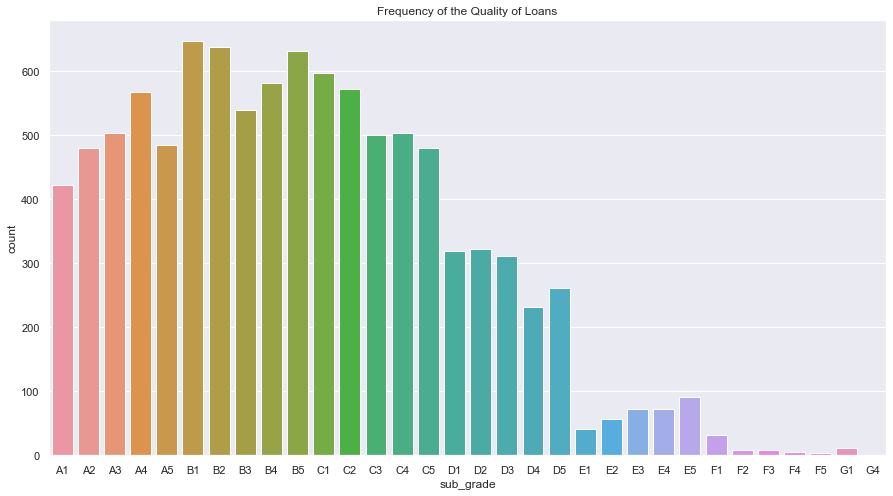

In [12]:
sns.countplot(data['sub_grade'].sort_values()).set(title="Frequency of the Quality of Loans")

Before looking at the data set we assumed that the majority of people would invest in extremely high quality loans and would therefore give a higher of preference to people with an AX rating. But from the above visualization we can see that the highest frequency is between A4 and C5. This implies that a lot of people are willing to make some risky bets in order to make money.

### Checking the interest rates on Loans across various quality  <a class="anchor" id="2-3"></a>

We observed that a lot of people are willing to make risky bets. We thought that a higher rate of returns would be enough incentive for people to make riskier bets on loans. 

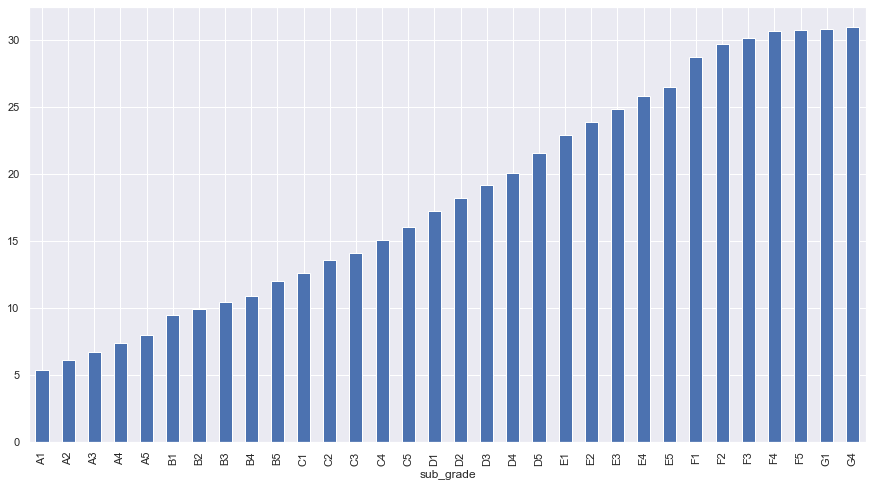

In [13]:
data.groupby(['sub_grade'])['interest_rate'].mean().plot(kind='bar')

Text(0.5, 1.0, 'Credit Score by Prosper Score')

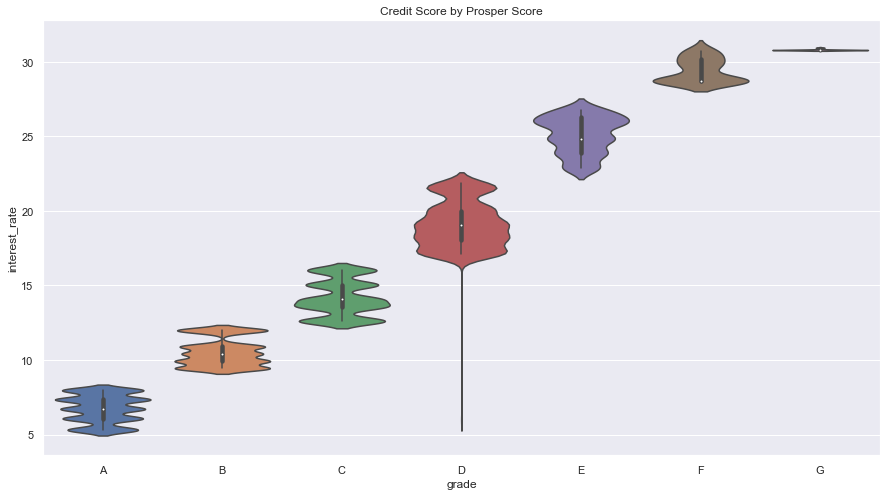

In [14]:
ax = sns.violinplot(x= 'grade', y ='interest_rate', data = data.sort_values('grade'), scale ='width' )
ax.set_title("Credit Score by Prosper Score")

From the above graph we can see that the interest made on relatively mediocre quality loans is quite decent between 9% to 16% on average. This is much better than returns people could make on savings. This is also advantageous for a borrower as people with the credit rating similar to people in these categories would need to take a high interest payday loan or a credit card loan which can range anywhere from between 23% to 30%.

## Let's Access the Risk of Loans

In [15]:
data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Charged Off', 'Late (16-30 days)'], dtype=object)

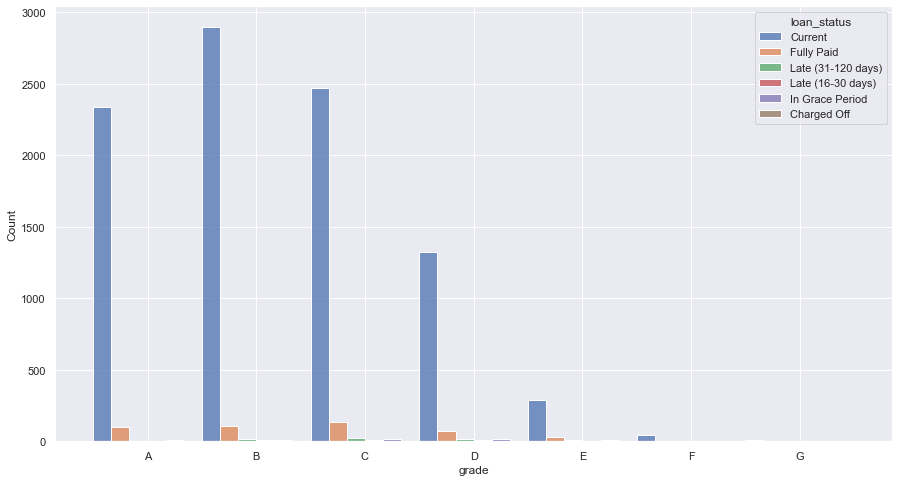

In [16]:
sns.histplot(binwidth=0.5, x="grade", hue="loan_status", data=data.sort_values('grade'), stat="count", multiple='dodge')

We can see that most loans are either paid off or in the process of being paid off.

This led us to an interesting question, 'What is the reason people from vastly different credit rating taking loans?'

In [39]:
sub_grade=sorted(list(data['sub_grade'].unique()))

In [40]:
@ipywidgets.interact(grade=sub_grade)
def purpose_plot(grade):
    data_subset = data.loc[data['sub_grade']==grade]
    data_subset['loan_purpose'].value_counts().plot(kind='bar', title="Distribution of Purpose of loan by Loan Sub Grade")

interactive(children=(Dropdown(description='grade', options=('A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', '…

Regardless of the quality of rating the loans have, they are mainly to consolidate their pre-existing debt or for their credit cards.

## Author's Notes

The dataset has a potential for bias as it could have been released by LendingClub to prop up their services. 

## References <a class="anchor" id="third-bullet"></a>


Data Sets. (n.d.). Retrieved 1 May 2022, from https://www.openintro.org/data/index.php?data=loans_full_schema


Loan Grading Definition. (n.d.). Investopedia. Retrieved 1 May 2022, from https://www.investopedia.com/terms/l/loan-grading.asp

LendingClub Logo, https://commons.wikimedia.org/wiki/File:LendingClub_logo.svg